## Imports

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

#Scikit learn imports:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors, metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#Other
from src.dataprep import prep_df
df = prep_df()
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,-1.277445,-1.160323,-0.994194
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0.066327,-0.259629,-0.173740
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,-1.236724,-0.362660,-0.959649
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0.514251,-0.746535,-0.195248
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,-1.236724,0.197365,-0.940457


## Quick Recap

Models are biased in favor of non churned customers, which is not great if I really want to spot who's gonna churn, this is likely due to there being far more examples of not churned customers.

(array([5163.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1869.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

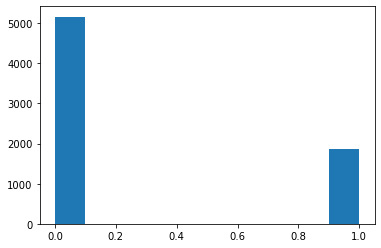

In [3]:
plt.hist(df['Churn'])

There are more than double the 0 (not churned) customers than 1 (churned) customers, I will fix this with Synthetic Minority Oversampling Technique, aka SMOTE

In [4]:
pip install imblearn

     |████████████████████████████████| 167 kB 2.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
from imblearn.over_sampling import SMOTE

In [6]:
smote = SMOTE()

Before I apply SMOTE I want to get my train test split ready, as I do not want any 'made up' data added to my testing data. 

In [7]:
X = df.drop(['Churn'], axis = 1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 7)
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size = .2, random_state = 7)

Before SMOTE:

(array([3304.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1196.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

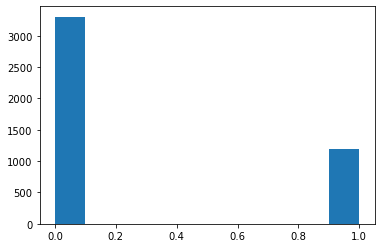

In [8]:
plt.hist(y_t)

In [9]:
X_t_s, y_t_s = smote.fit_sample(X_t, y_t)

After SMOTE:

(array([3304.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3304.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

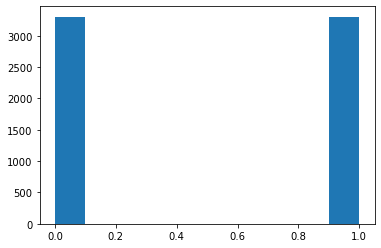

In [10]:
plt.hist(y_t_s)

Perfect, hope this helps

### KNN

In [11]:
knn = neighbors.KNeighborsClassifier()
knn.fit(X_t_s, y_t_s)
train_pred = knn.predict(X_t_s)
print("Train:")
print(recall_score(train_pred, y_t_s))
val_pred = knn.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.8112429087158329
Val:
0.43458980044345896


In [16]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 2, p = 2)
knn.fit(X_t_s, y_t_s)
train_pred = knn.predict(X_t_s)
print("Train:")
print(recall_score(train_pred, y_t_s))
val_pred = knn.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
1.0
Val:
0.4574898785425101


In [17]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 3, p = 2)
knn.fit(X_t_s, y_t_s)
train_pred = knn.predict(X_t_s)
print("Train:")
print(recall_score(train_pred, y_t_s))
val_pred = knn.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.8533262089233236
Val:
0.42206235011990406


In [18]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 7, p = 2)
knn.fit(X_t_s, y_t_s)
train_pred = knn.predict(X_t_s)
print("Train:")
print(recall_score(train_pred, y_t_s))
val_pred = knn.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.7838383838383839
Val:
0.42071881606765327


In [19]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 10, p = 2)
knn.fit(X_t_s, y_t_s)
train_pred = knn.predict(X_t_s)
print("Train:")
print(recall_score(train_pred, y_t_s))
val_pred = knn.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.7922628510863805
Val:
0.43207126948775054


In [21]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 13, p = 2)
knn.fit(X_t_s, y_t_s)
train_pred = knn.predict(X_t_s)
print("Train:")
print(recall_score(train_pred, y_t_s))
val_pred = knn.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.7533632286995515
Val:
0.43259557344064387


In [23]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 11, p = 2)
knn.fit(X_t_s, y_t_s)
train_pred = knn.predict(X_t_s)
print("Train:")
print(recall_score(train_pred, y_t_s))
val_pred = knn.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.7635591102224444
Val:
0.4291497975708502


In [24]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 12, p = 2)
knn.fit(X_t_s, y_t_s)
train_pred = knn.predict(X_t_s)
print("Train:")
print(recall_score(train_pred, y_t_s))
val_pred = knn.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.7785939139559287
Val:
0.4400871459694989


In [77]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 12, p = 2)
knn.fit(X_t_s, y_t_s)

print("Train:")
print(knn.score(X_t_s, y_t_s))

print("Val:")
print(knn.score(X_val, y_val))

Train:
0.8214285714285714
Val:
0.6995555555555556


[[585 257]
 [ 81 202]]


<AxesSubplot:>

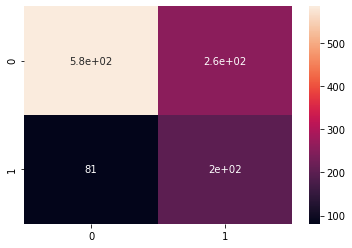

In [25]:
y_hat = knn.predict(X_val)
cf_mat = confusion_matrix(y_val, y_hat)
print(cf_mat)
sns.heatmap(cf_mat, annot=True)

(array([666.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 459.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

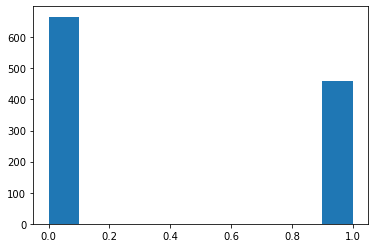

In [26]:
plt.hist(y_hat)

Now the bias is towards churned customers, remember that this is what the ture results should be:

(array([842.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 283.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

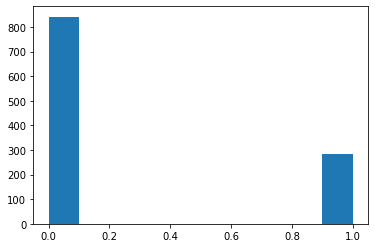

In [28]:
plt.hist(y_val)

This is still improvment, I'd rather it over predict customer churn than not at all

### Random Forest

In [29]:
rf = RandomForestClassifier(n_estimators=10, max_depth=None, max_features='auto', random_state = 7)

rf.fit(X_t_s, y_t_s)
train_pred = rf.predict(X_t_s)
print("Train:")
print(recall_score(train_pred, y_t_s))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.9942037827943868
Val:
0.5379310344827586


In [30]:
rf = RandomForestClassifier(n_estimators=100, max_depth=None, max_features='auto', random_state = 7)

rf.fit(X_t_s, y_t_s)
train_pred = rf.predict(X_t_s)
print("Train:")
print(recall_score(train_pred, y_t_s))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.9972826086956522
Val:
0.5382262996941896


In [34]:
rf = RandomForestClassifier(n_estimators=200, max_depth=None, max_features='auto', random_state = 7)

rf.fit(X_t_s, y_t_s)
train_pred = rf.predict(X_t_s)
print("Train:")
print(recall_score(train_pred, y_t_s))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.997583081570997
Val:
0.5349544072948328


In [35]:
rf = RandomForestClassifier(n_estimators=300, max_depth=None, max_features='auto', random_state = 7)

rf.fit(X_t_s, y_t_s)
train_pred = rf.predict(X_t_s)
print("Train:")
print(recall_score(train_pred, y_t_s))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.997583081570997
Val:
0.5421686746987951


In [36]:
rf = RandomForestClassifier(n_estimators=350, max_depth=None, max_features='auto', random_state = 7)

rf.fit(X_t_s, y_t_s)
train_pred = rf.predict(X_t_s)
print("Train:")
print(recall_score(train_pred, y_t_s))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.9972826086956522
Val:
0.5402985074626866


In [37]:
rf = RandomForestClassifier(n_estimators=325, max_depth=None, max_features='auto', random_state = 7)

rf.fit(X_t_s, y_t_s)
train_pred = rf.predict(X_t_s)
print("Train:")
print(recall_score(train_pred, y_t_s))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.997583081570997
Val:
0.5416666666666666


I'm gonna try some lower n_estimators to see how it works out, but 300 looks like its winning so far

In [38]:
rf = RandomForestClassifier(n_estimators=30, max_depth=None, max_features='auto', random_state = 7)

rf.fit(X_t_s, y_t_s)
train_pred = rf.predict(X_t_s)
print("Train:")
print(recall_score(train_pred, y_t_s))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.9966777408637874
Val:
0.5374592833876222


In [39]:
rf = RandomForestClassifier(n_estimators=50, max_depth=None, max_features='auto', random_state = 7)

rf.fit(X_t_s, y_t_s)
train_pred = rf.predict(X_t_s)
print("Train:")
print(recall_score(train_pred, y_t_s))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.9975816203143894
Val:
0.5391849529780565


yup, 300 wins, onto max_depth

In [48]:
rf = RandomForestClassifier(n_estimators=300, max_depth=5, max_features='auto', random_state = 7)

rf.fit(X_t_s, y_t_s)
train_pred = rf.predict(X_t_s)
print("Train:")
print(recall_score(train_pred, y_t_s))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.7631368364897306
Val:
0.49671772428884026


In [49]:
rf = RandomForestClassifier(n_estimators=300, max_depth=10, max_features='auto', random_state = 7)

rf.fit(X_t_s, y_t_s)
train_pred = rf.predict(X_t_s)
print("Train:")
print(recall_score(train_pred, y_t_s))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.862830651758931
Val:
0.5268542199488491


In [59]:
rf = RandomForestClassifier(n_estimators=300, max_depth=7, max_features='auto', random_state = 7)

rf.fit(X_t_s, y_t_s)
train_pred = rf.predict(X_t_s)
print("Train:")
print(recall_score(train_pred, y_t_s))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.7919229740572346
Val:
0.5114678899082569


In [50]:
rf = RandomForestClassifier(n_estimators=300, max_depth=15, max_features='auto', random_state = 7)

rf.fit(X_t_s, y_t_s)
train_pred = rf.predict(X_t_s)
print("Train:")
print(recall_score(train_pred, y_t_s))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.9683191551774714
Val:
0.5404624277456648


In [51]:
rf = RandomForestClassifier(n_estimators=300, max_depth=20, max_features='auto', random_state = 7)

rf.fit(X_t_s, y_t_s)
train_pred = rf.predict(X_t_s)
print("Train:")
print(recall_score(train_pred, y_t_s))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.9972817879794624
Val:
0.5373134328358209


In [53]:
rf = RandomForestClassifier(n_estimators=300, max_depth=16, max_features='auto', random_state = 7)

rf.fit(X_t_s, y_t_s)
train_pred = rf.predict(X_t_s)
print("Train:")
print(recall_score(train_pred, y_t_s))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.9789567279193835
Val:
0.5311572700296736


In [54]:
rf = RandomForestClassifier(n_estimators=300, max_depth=14, max_features='auto', random_state = 7)

rf.fit(X_t_s, y_t_s)
train_pred = rf.predict(X_t_s)
print("Train:")
print(recall_score(train_pred, y_t_s))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.9520923520923521
Val:
0.5266106442577031


max_depth = 15 wins, but this is still overfit, lets hope max_features helps out

In [55]:
rf = RandomForestClassifier(n_estimators=300, max_depth=15, max_features=15, random_state = 7)

rf.fit(X_t_s, y_t_s)
train_pred = rf.predict(X_t_s)
print("Train:")
print(recall_score(train_pred, y_t_s))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.9777909387029908
Val:
0.5331412103746398


In [56]:
rf = RandomForestClassifier(n_estimators=300, max_depth=15, max_features=10, random_state = 7)

rf.fit(X_t_s, y_t_s)
train_pred = rf.predict(X_t_s)
print("Train:")
print(recall_score(train_pred, y_t_s))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.9743287105340809
Val:
0.5304347826086957


In [57]:
rf = RandomForestClassifier(n_estimators=300, max_depth=15, max_features=5, random_state = 7)

rf.fit(X_t_s, y_t_s)
train_pred = rf.predict(X_t_s)
print("Train:")
print(recall_score(train_pred, y_t_s))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.9700352526439483
Val:
0.5397727272727273


In [58]:
rf = RandomForestClassifier(n_estimators=300, max_depth=15, max_features=3, random_state = 7)

rf.fit(X_t_s, y_t_s)
train_pred = rf.predict(X_t_s)
print("Train:")
print(recall_score(train_pred, y_t_s))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.9646405610753945
Val:
0.5377906976744186


I'm going to go back to using a lower max_depth to make the model less overfit, then try and optimize it more

I toyed around for a bit with the n_estimators again and managed to get to about 53% recall, and about 77% accuracy. While this isn't fantastic it is certainly an improvment, originaly the model would almost only predict 'not churned' which made the accuracy and recall look better than what they really were because the dataset was very lopsided in favor of 'not churned'. Now 'churned' customers can be identified signifigantly better than before: 

In [74]:
rf = RandomForestClassifier(n_estimators=255, max_depth=10, max_features=5, random_state = 7)

rf.fit(X_t_s, y_t_s)
train_pred = rf.predict(X_t_s)
print("Train:")
print(recall_score(train_pred, y_t_s))
val_pred = rf.predict(X_val)
print("Val:")
print(recall_score(val_pred, y_val))

Train:
0.86735807860262
Val:
0.5271317829457365


In [75]:
rf = RandomForestClassifier(n_estimators=255, max_depth=10, max_features=5, random_state = 7)

rf.fit(X_t_s, y_t_s)

print("Train:")
print(rf.score(X_t_s, y_t_s))

print("Val:")
print(rf.score(X_val, y_val))

Train:
0.9073849878934624
Val:
0.7671111111111111


[[659 183]
 [ 79 204]]


<AxesSubplot:>

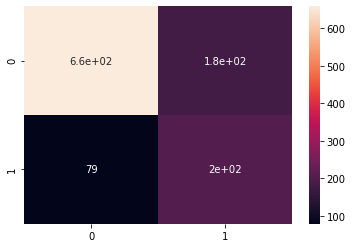

In [76]:
y_hat = rf.predict(X_val)
cf_mat = confusion_matrix(y_val, y_hat)
print(cf_mat)
sns.heatmap(cf_mat, annot=True)

This one is better than the KNN by just a little bit, but it still won. 